<a href="https://colab.research.google.com/github/shekhar-banerjee96/911callslist/blob/master/Copy_of_Shoppinng_Intent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

## Deep Learning Libraries
from tensorflow import keras
from keras.layers import Dense
from keras import Sequential
from keras.callbacks import EarlyStopping

Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.

To predict whether the shopper will be puschsing anything or not ?

In [4]:
#df = pd.read_csv('C:/Users/HP-PC/DEV/Learnbay/Stats_ML/Dataset/online+shoppers+purchasing+intention+dataset/online_shoppers_intention.csv')
#df = pd.read_csv('online_shoppers_intention.csv')
df = pd.read_csv('/content/drive/MyDrive/online_shoppers_intention.csv')

In [5]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

# Dataset columns Description -

- "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration"  - represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.

- The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

- The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

In [8]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [9]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [10]:
df['Revenue'] = df['Revenue'].astype('category').cat.codes

In [11]:
df['Revenue'].value_counts()

Revenue
0    10422
1     1908
Name: count, dtype: int64

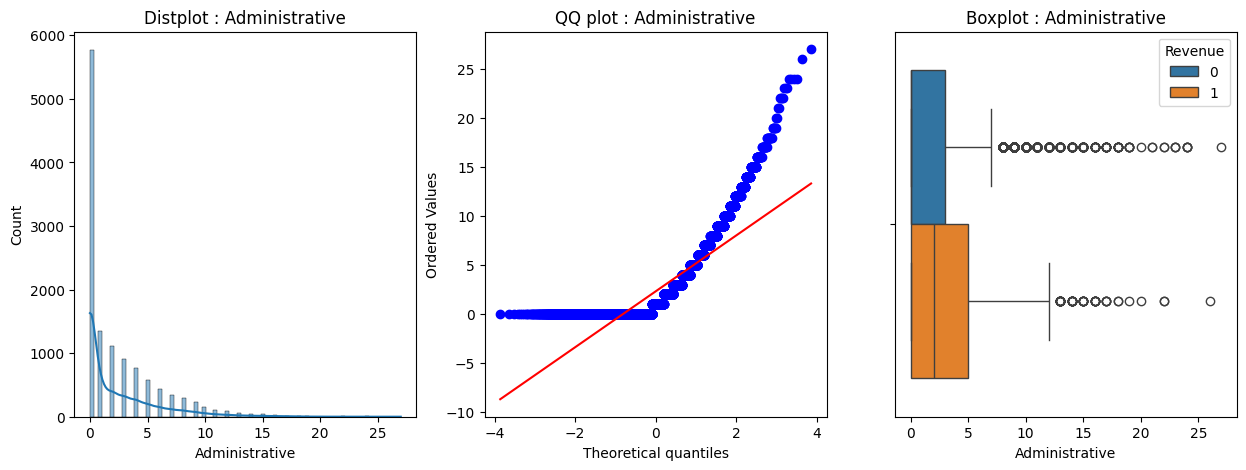

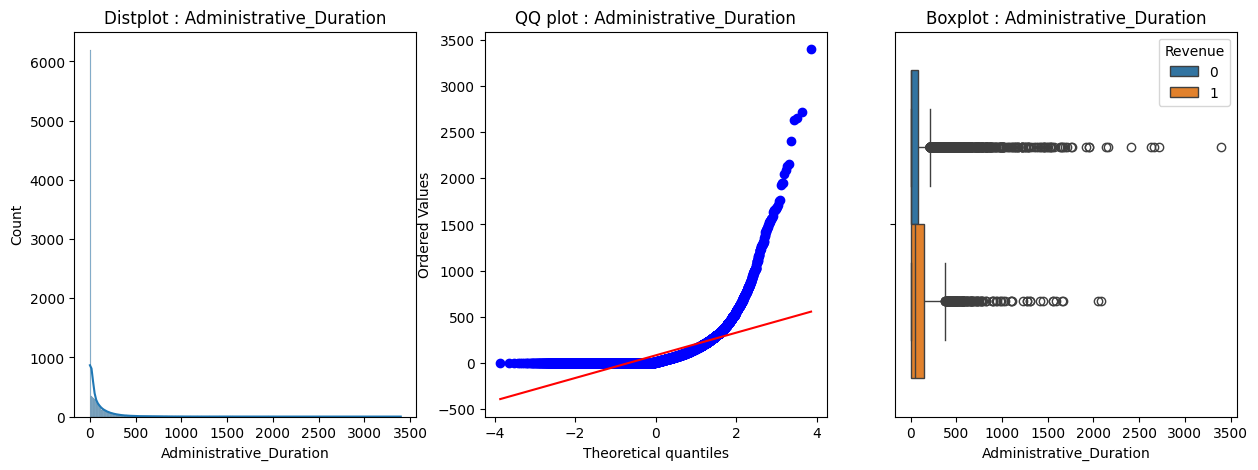

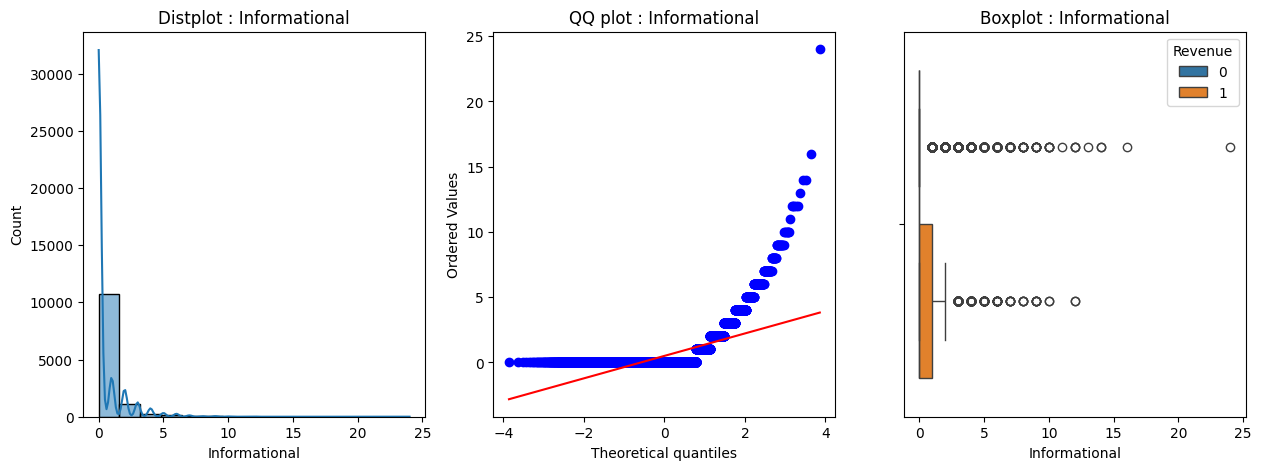

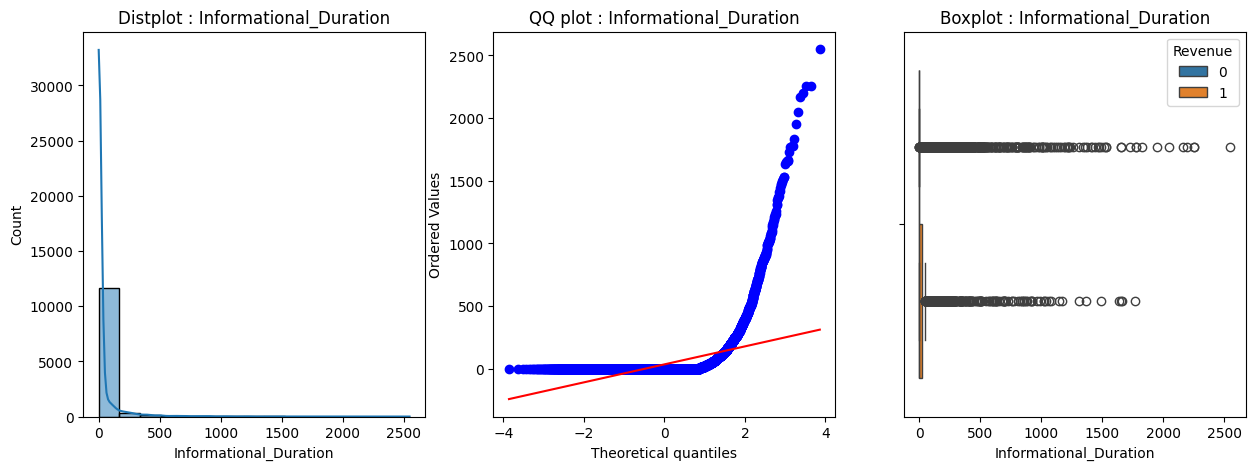

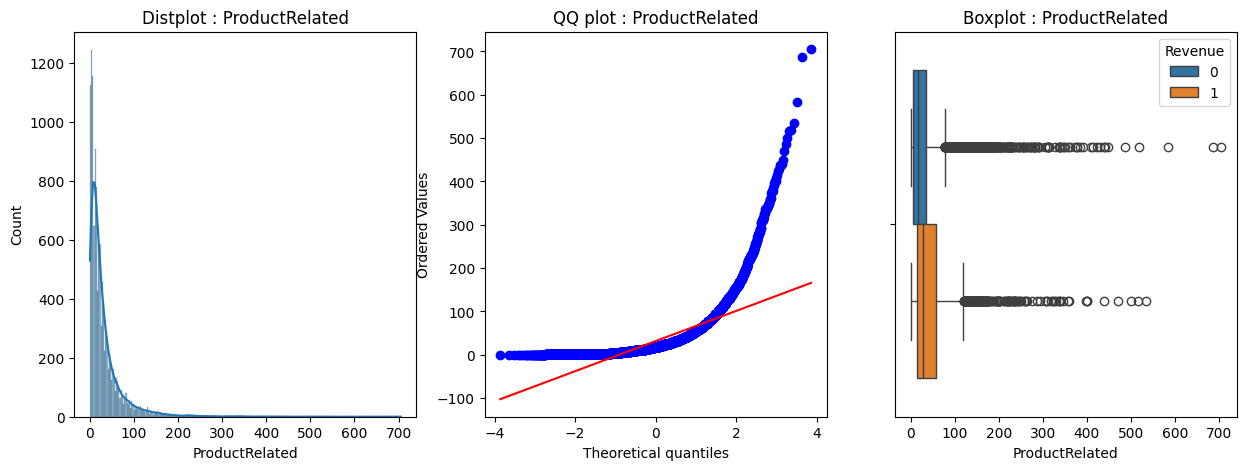

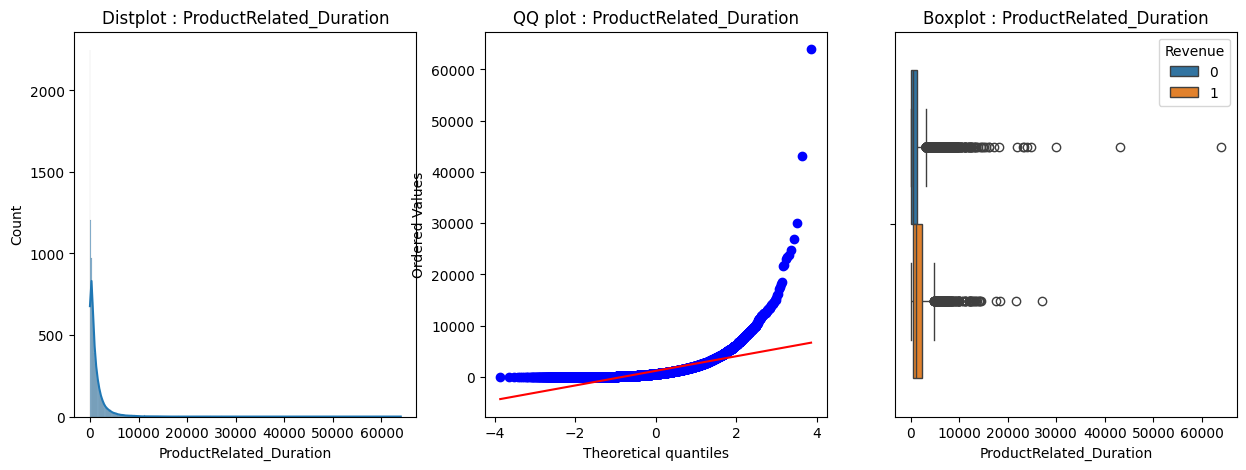

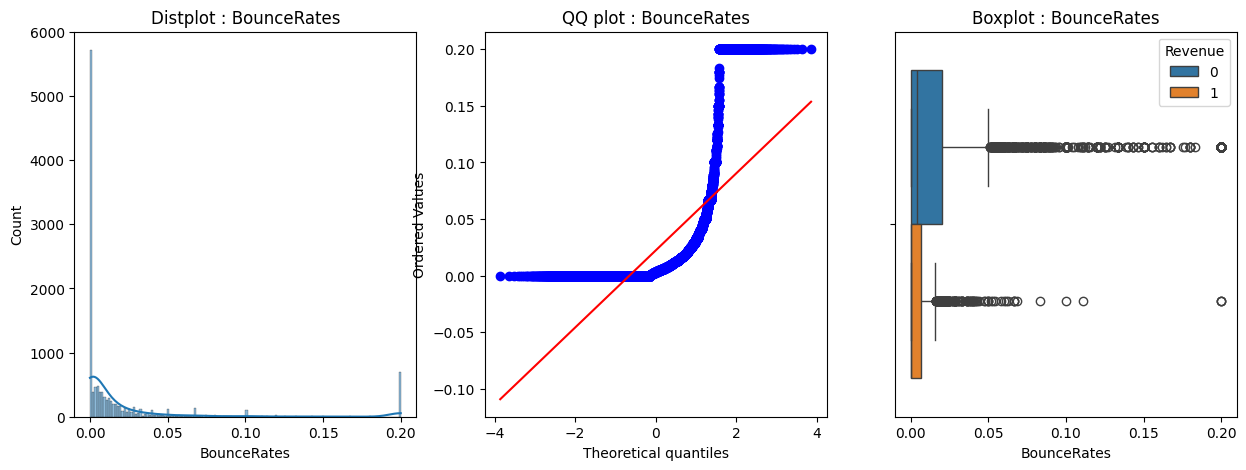

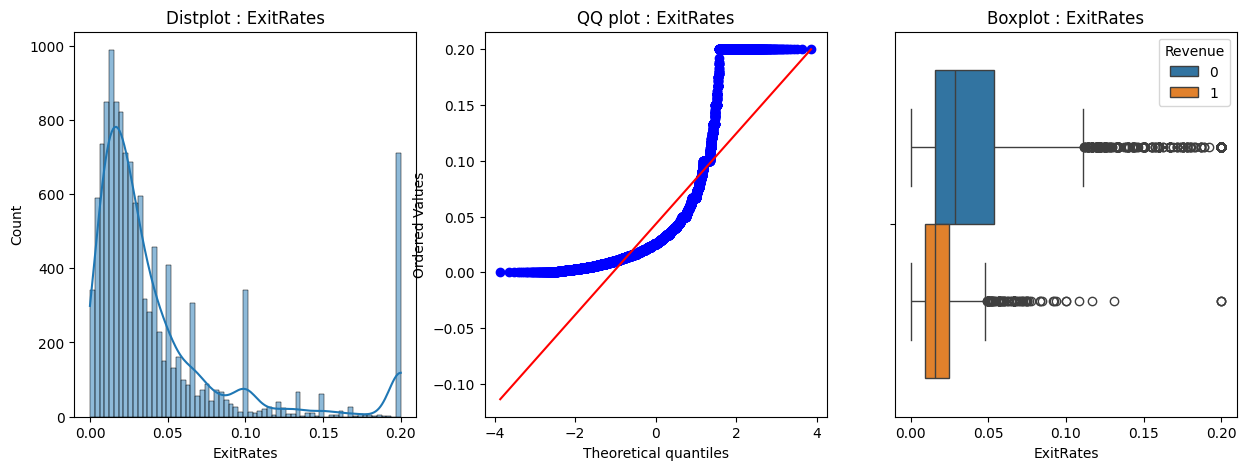

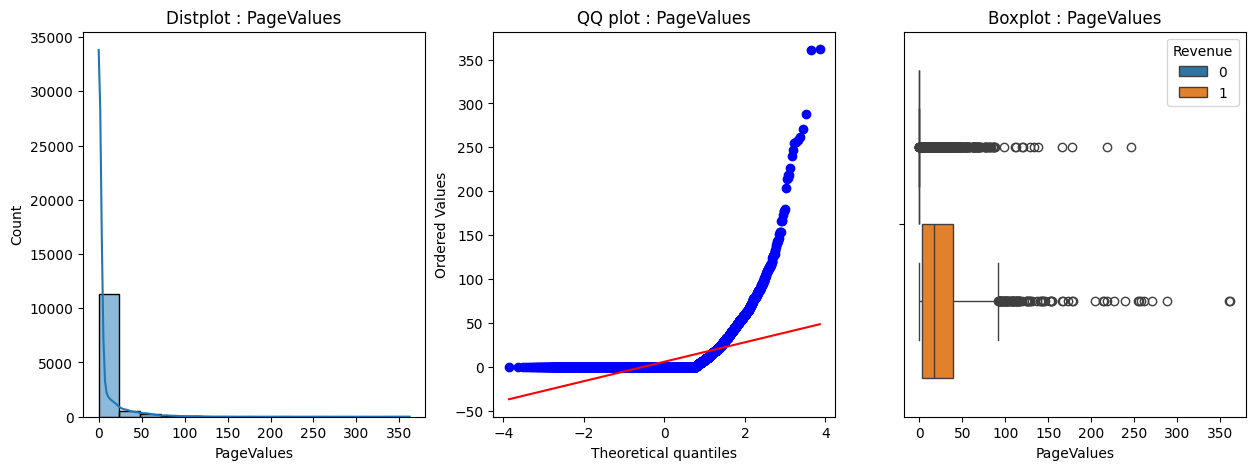

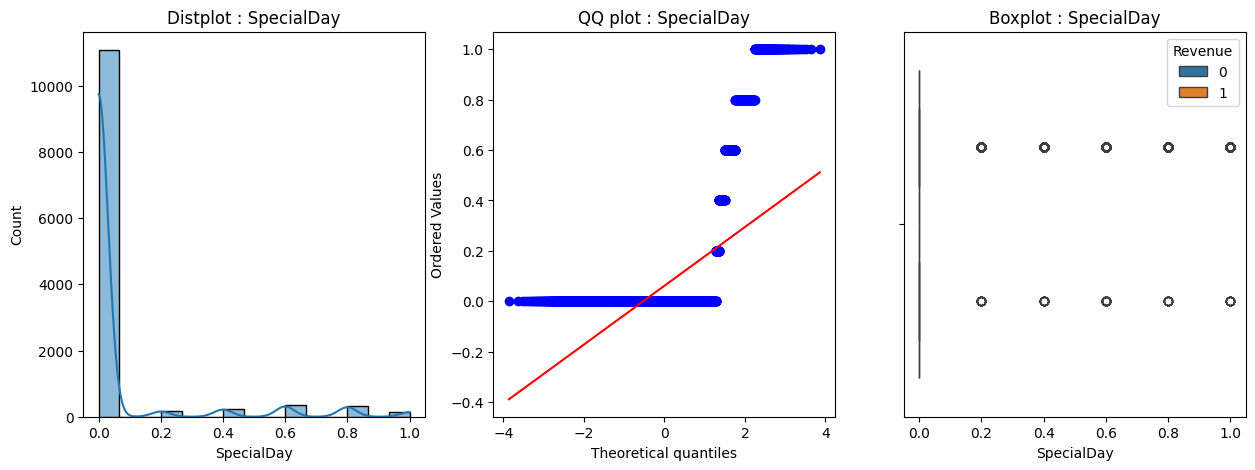

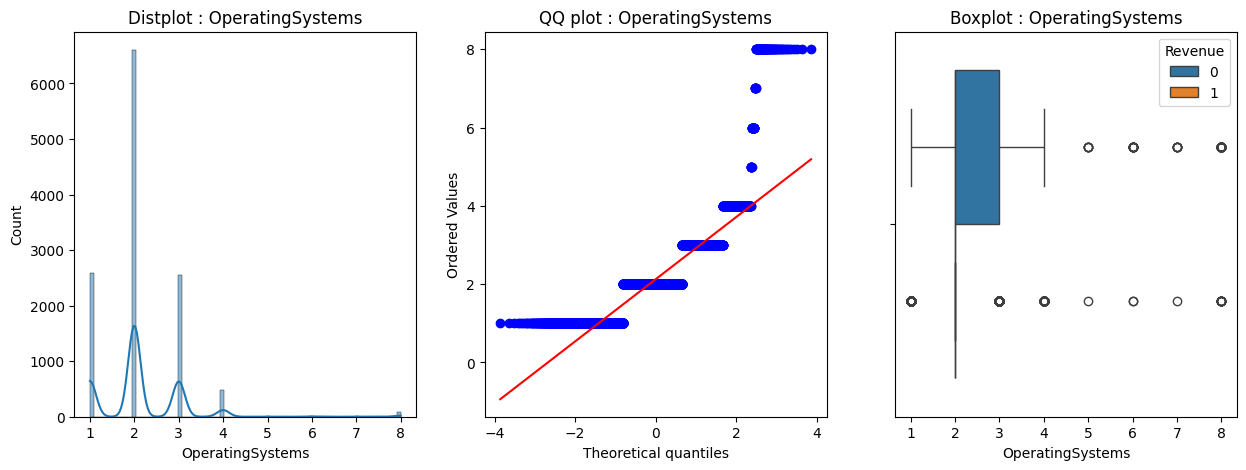

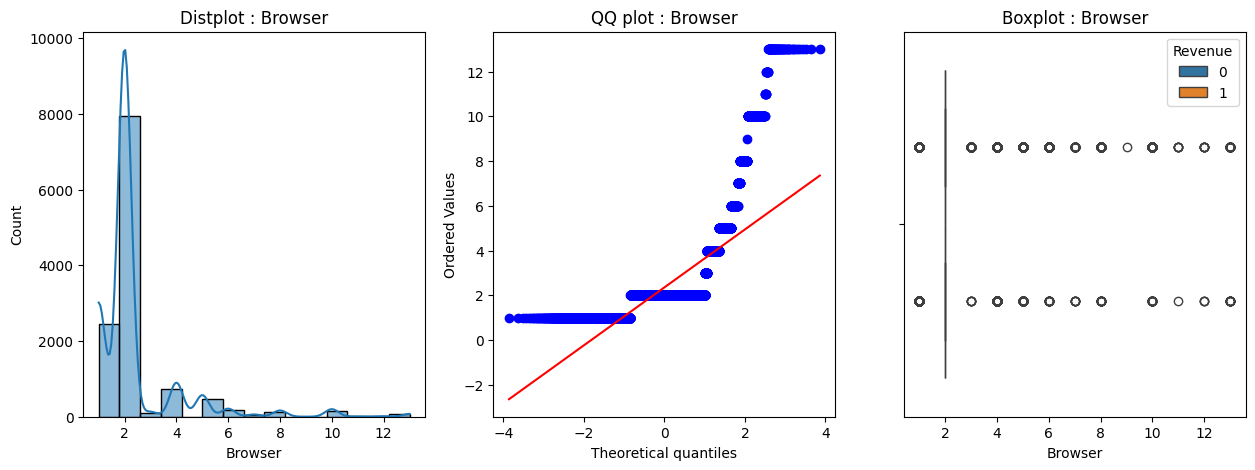

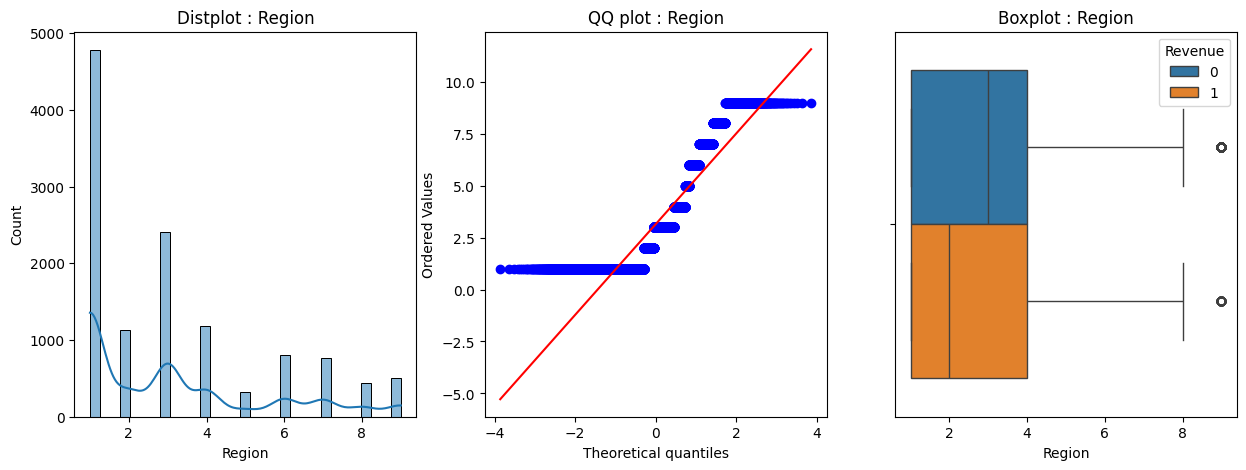

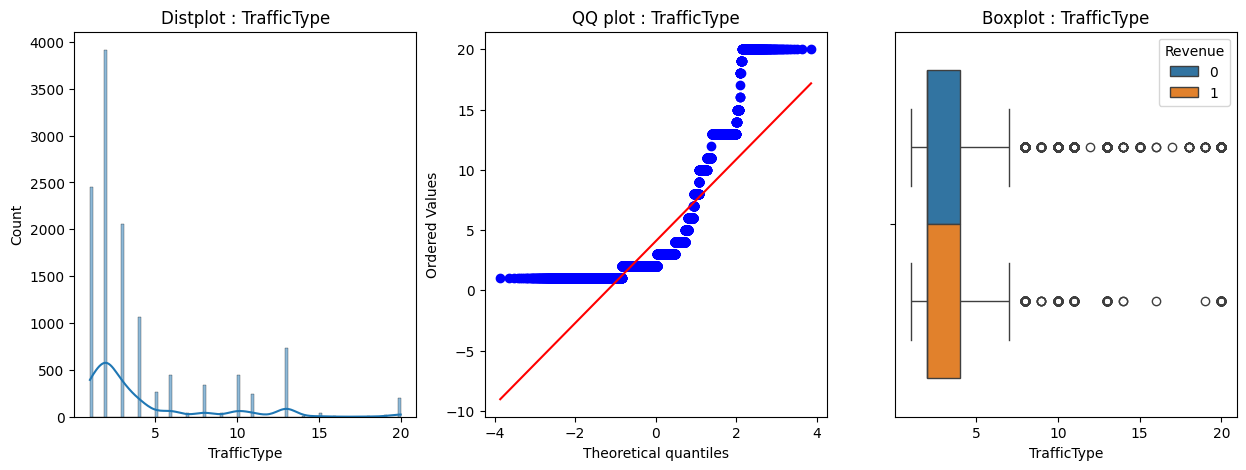

In [12]:
for col in df.select_dtypes(['int64', 'float64']).columns :
    plt.figure(figsize=(15,5))


    plt.subplot(131)
    sns.histplot(df[col],kde=True)
    plt.title(f'Distplot : {col}')

    plt.subplot(132)
    stats.probplot(df[col],dist='norm',plot = plt)
    plt.title(f'QQ plot : {col}')

    plt.subplot(133)
    sns.boxplot( x = col , hue = 'Revenue' , data = df)
    plt.title(f'Boxplot : {col}')


    plt.show()

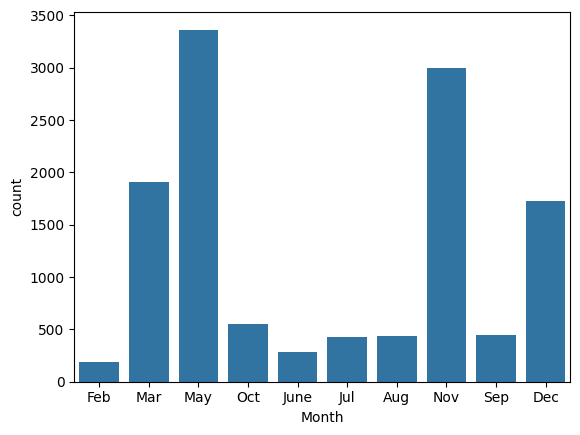

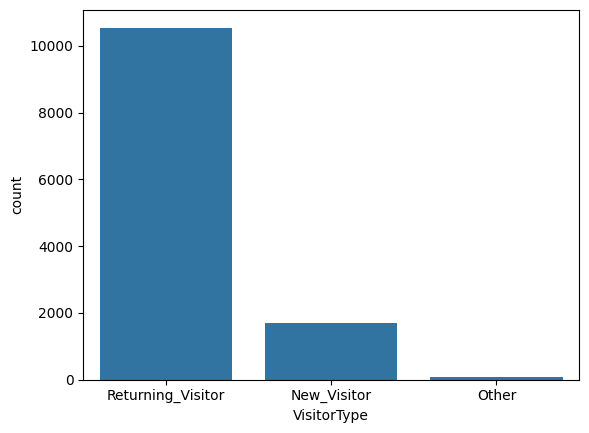

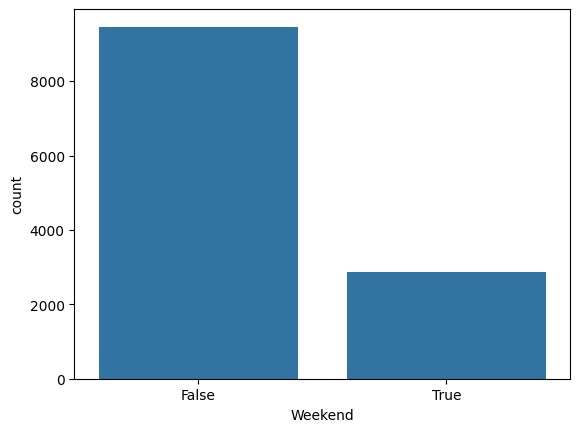

In [13]:
for col in df.select_dtypes(['object', 'bool']).columns :

    sns.countplot(x=col,data = df)
    plt.show()

In [14]:
df['Weekend'] = df['Weekend'].astype('category').cat.codes

In [15]:
Month = {
    'Jan' : 1 ,
    'Feb' : 2 ,
    'Mar' : 3 ,
    'May' : 4 ,
    'June' : 5 ,
    'Jul' : 6 ,
    'Aug' : 7 ,
    'Sep' : 8 ,
    'Oct' : 9 ,
    'Nov' : 10 ,
    'Dec' : 11
}

df['Month'] = df['Month'].apply(lambda x : Month[x])

In [16]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,Returning_Visitor,1,0


In [17]:
x = df.drop('Revenue',axis=1)
y = df['Revenue']

In [18]:
x = pd.get_dummies(x)
x.drop('VisitorType_Other',inplace=True , axis= 1)

In [19]:
x.select_dtypes(['int64','float64']).skew()

Administrative             1.960357
Administrative_Duration    5.615719
Informational              4.036464
Informational_Duration     7.579185
ProductRelated             4.341516
ProductRelated_Duration    7.263228
BounceRates                2.947855
ExitRates                  2.148789
PageValues                 6.382964
SpecialDay                 3.302667
Month                      0.061312
OperatingSystems           2.066285
Browser                    3.242350
Region                     0.983549
TrafficType                1.962987
dtype: float64

In [20]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  Month                          12330 non-null  int64  
 11  OperatingSystems               12330 non-null  int64  
 12  Browser                        12330 non-null 

In [21]:
for col in x.columns :
    print(f'For {col} : \n {list(set(x[col]))[:20]} \n')

For Administrative : 
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19] 

For Administrative_Duration : 
 [0.0, 2.0, 3.0, 4.0, 5.5, 6.0, 7.0, 8.0, 9.0, 9.5, 10.0, 11.0, 13.0, 14.0, 15.0, 16.0, 11.88888889, 18.0, 18.33333333, 20.0] 

For Informational : 
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 24] 

For Informational_Duration : 
 [0.0, 1.0, 2.0, 3.0, 4.0, 5.5, 6.0, 7.0, 8.0, 9.0, 9.5, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0] 

For ProductRelated : 
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19] 

For ProductRelated_Duration : 
 [0.0, 1.0, 0.5, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0] 

For BounceRates : 
 [0.0, 0.015625, 0.0625, 0.125, 0.03125, 0.076923077, 0.015819209, 0.003508772, 0.041176471, 0.007017544, 0.010112994, 0.00610687, 0.008954009, 0.010526316, 0.019230769, 0.004807692, 0.014035088, 0.008873457, 0.115384615, 0.009758454] 

For ExitRates : 
 [0.1

In [22]:
check_skew = x.select_dtypes(include=['float64','int64']).skew()
fix_skew_columns  = check_skew[(check_skew > 0.5) | (check_skew < -0.5) ].index
fix_skew_columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType'],
      dtype='object')

In [23]:
from sklearn.preprocessing import PowerTransformer



transformer = PowerTransformer(method='yeo-johnson')

x.loc[:,fix_skew_columns] = transformer.fit_transform(x.loc[:,fix_skew_columns])

In [24]:
x.select_dtypes(['int64','float64']).skew()

Administrative             0.243728
Administrative_Duration    0.145485
Informational              1.404111
Informational_Duration     1.546903
ProductRelated            -0.002576
ProductRelated_Duration   -0.036336
BounceRates                1.032599
ExitRates                  0.433598
PageValues                 1.377420
SpecialDay                 2.640515
Month                      0.061312
OperatingSystems          -0.010325
Browser                   -0.001701
Region                     0.130311
TrafficType                0.151907
dtype: float64

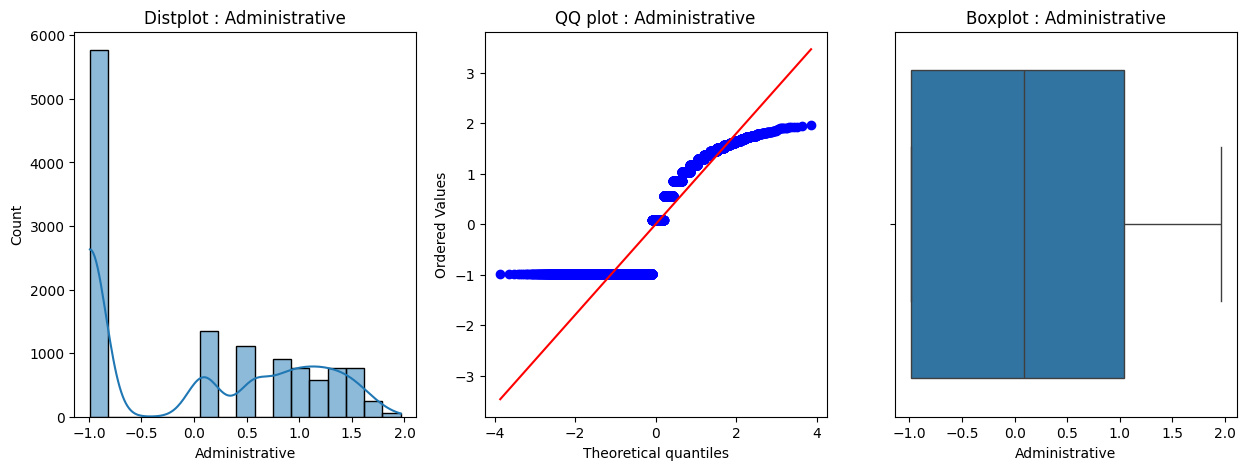

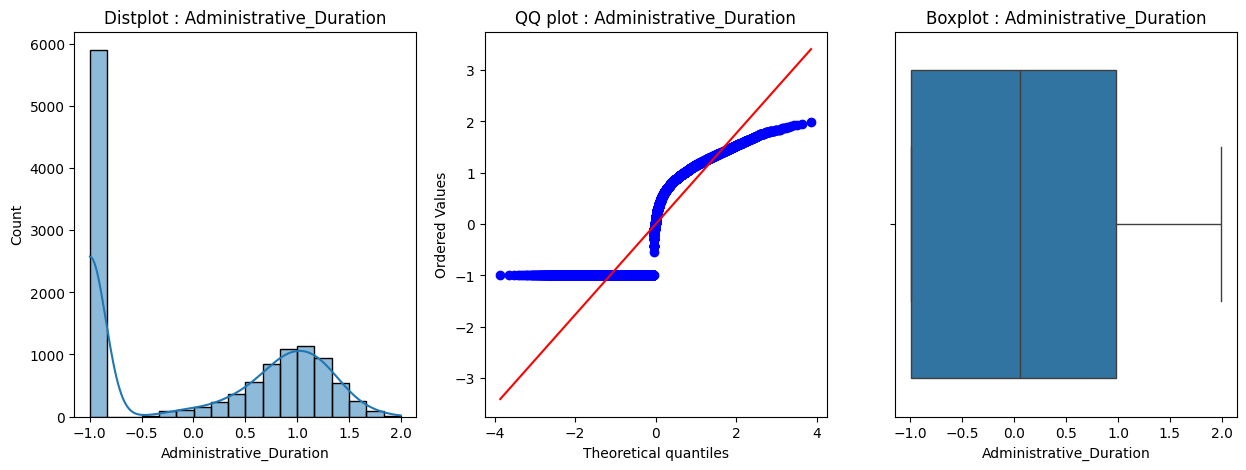

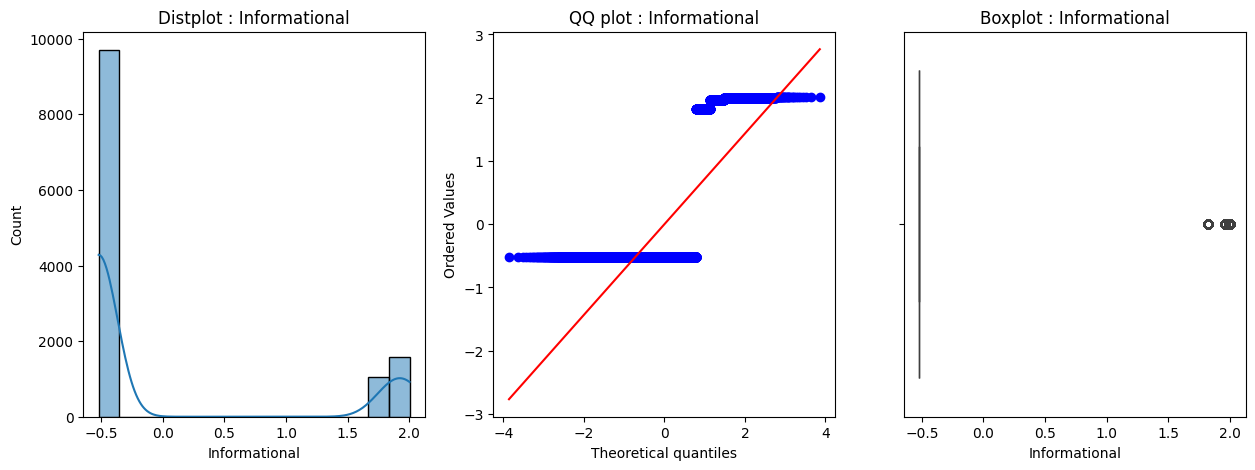

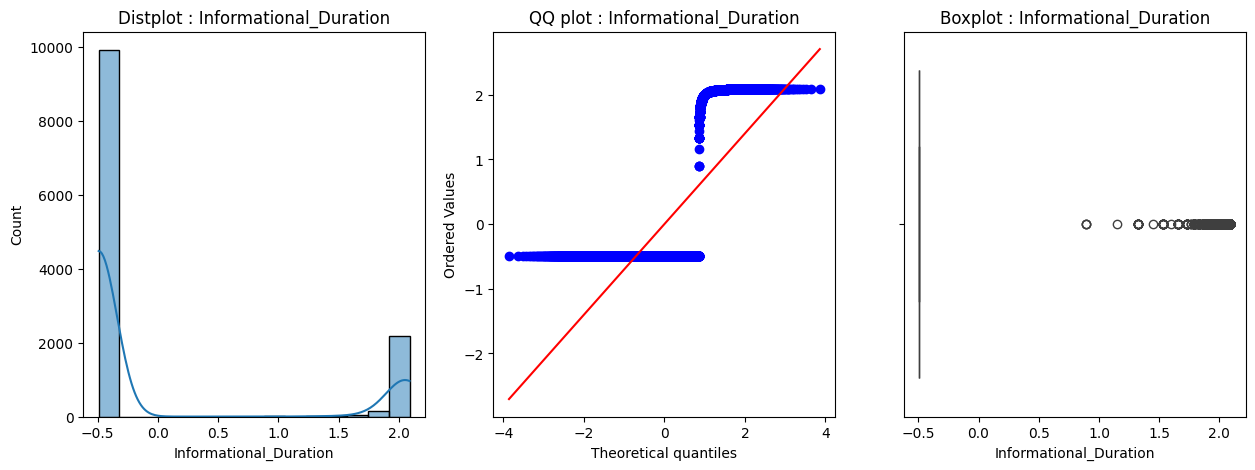

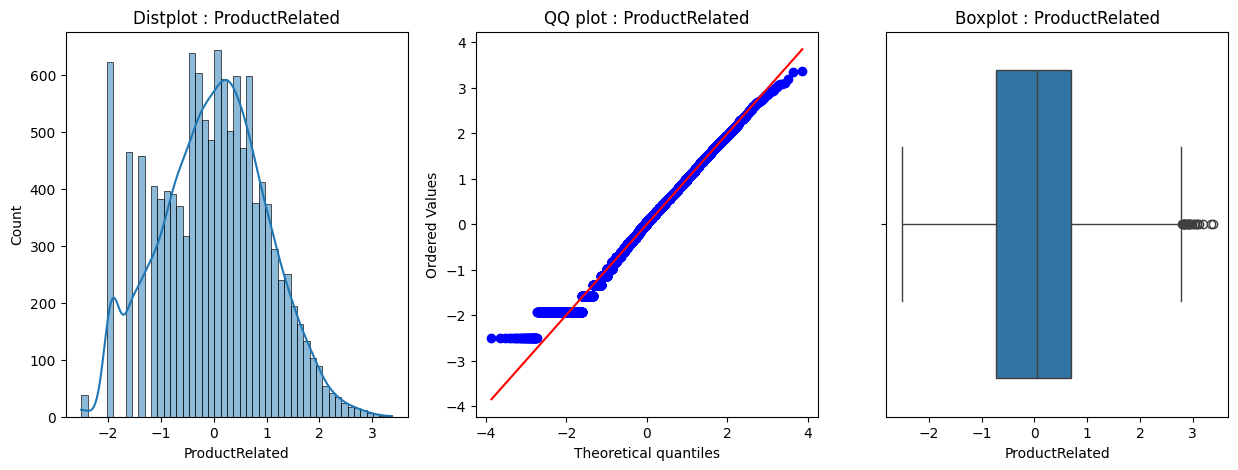

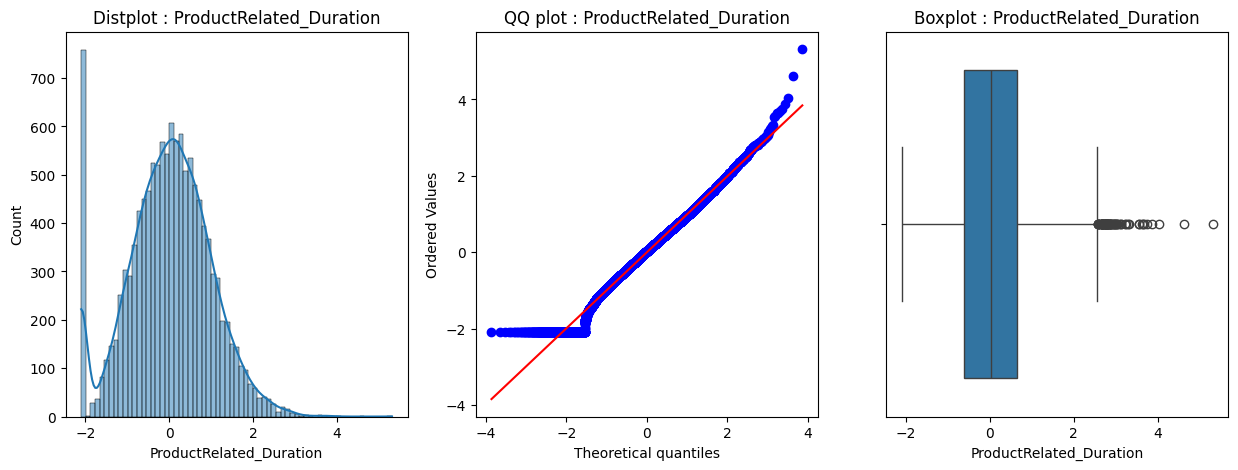

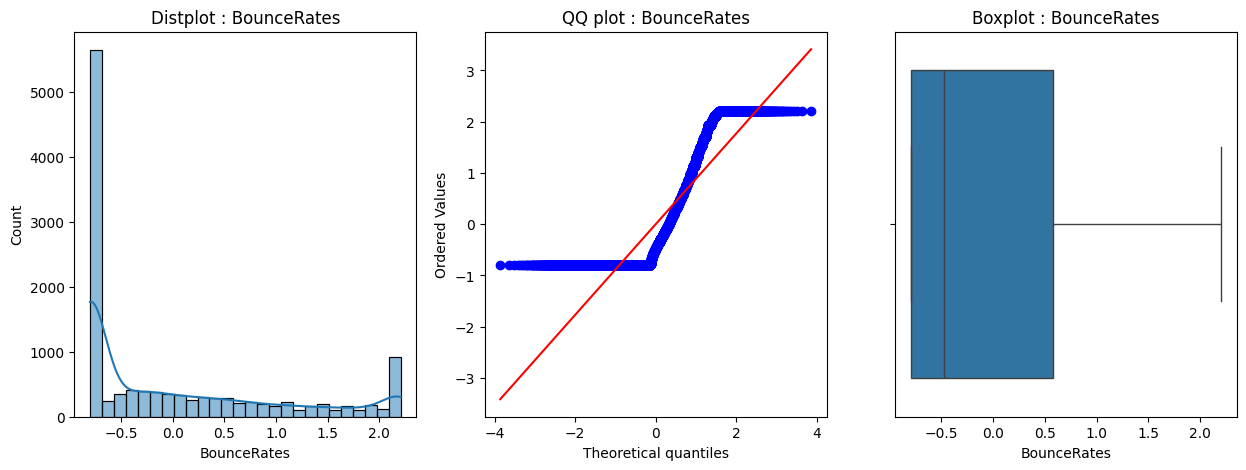

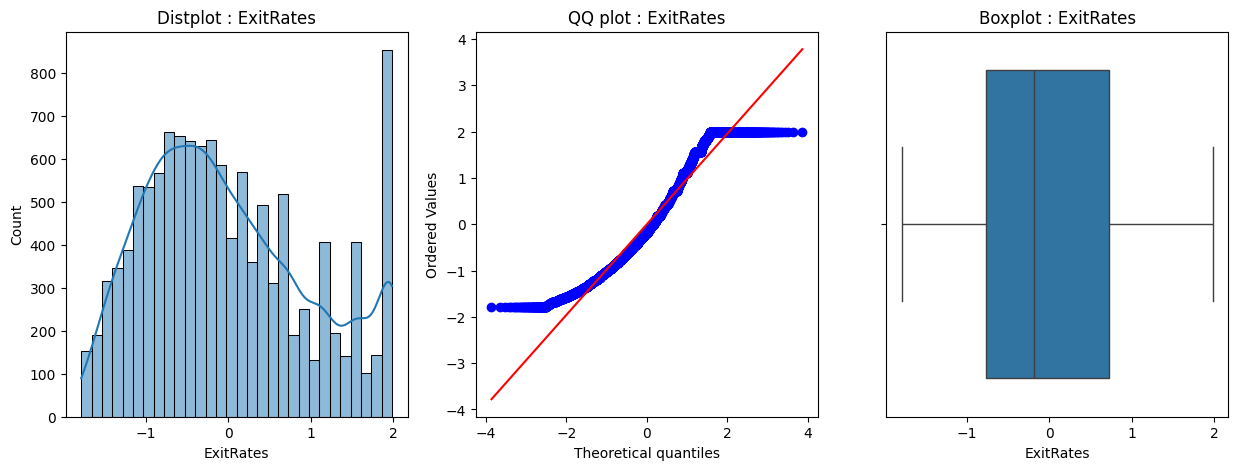

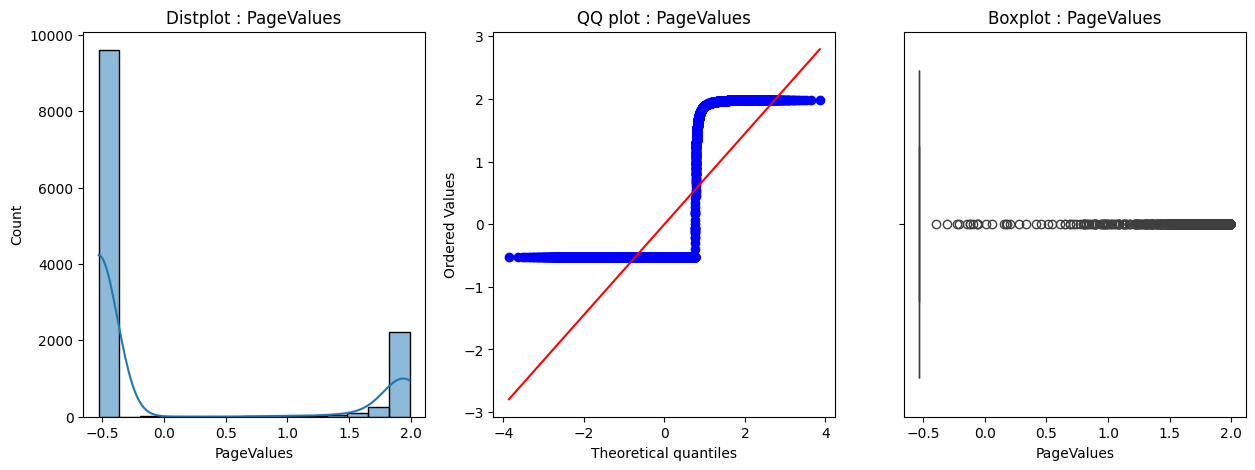

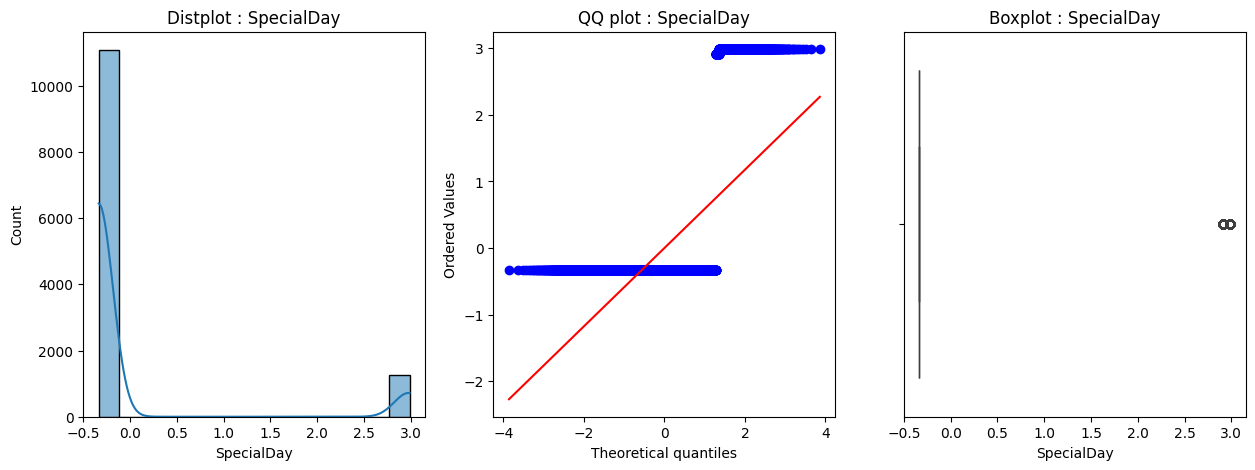

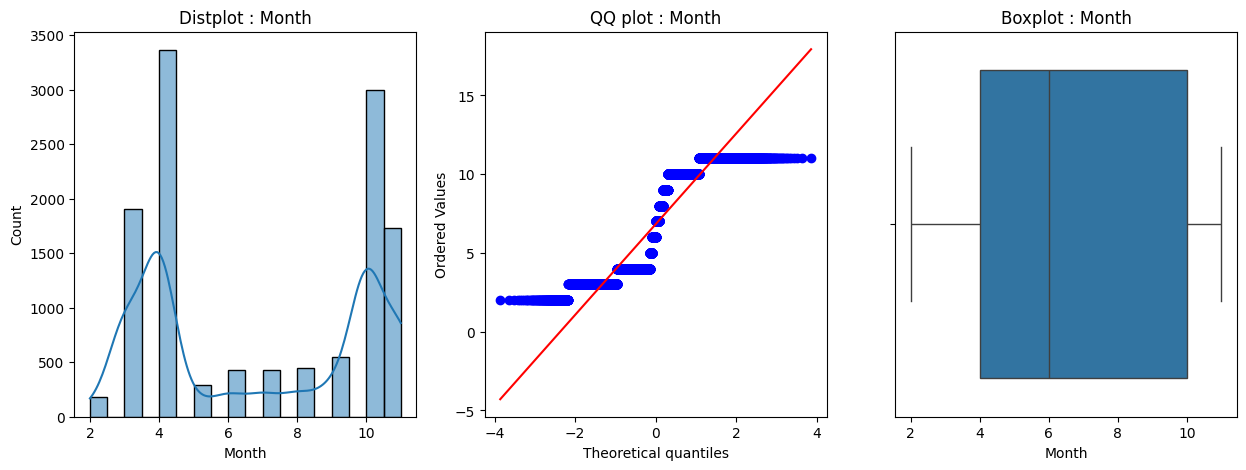

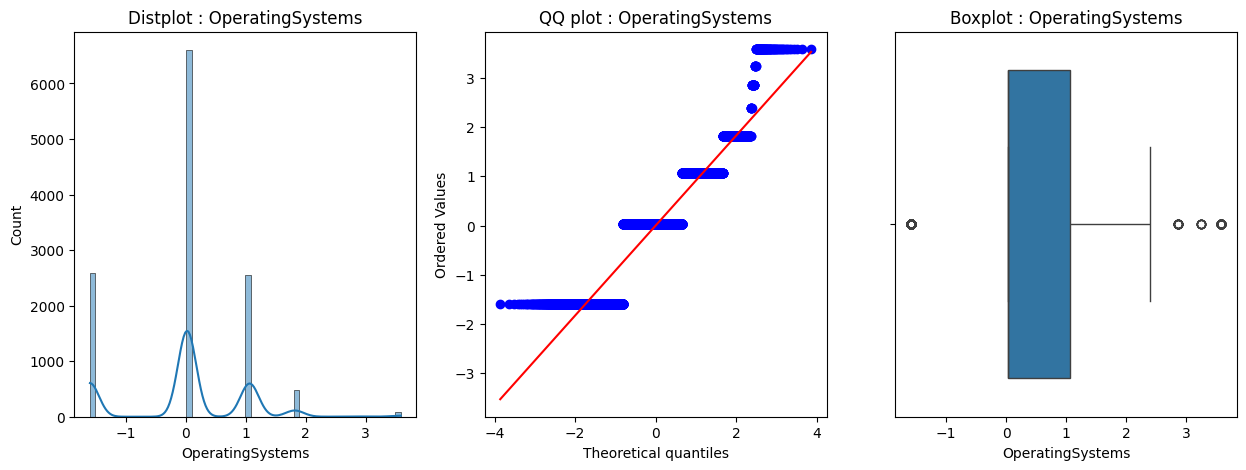

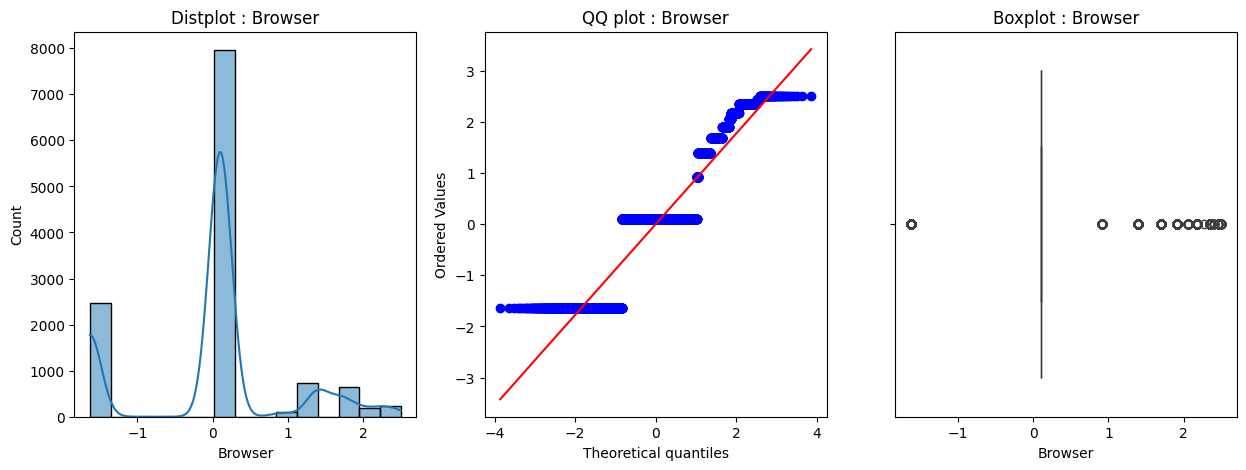

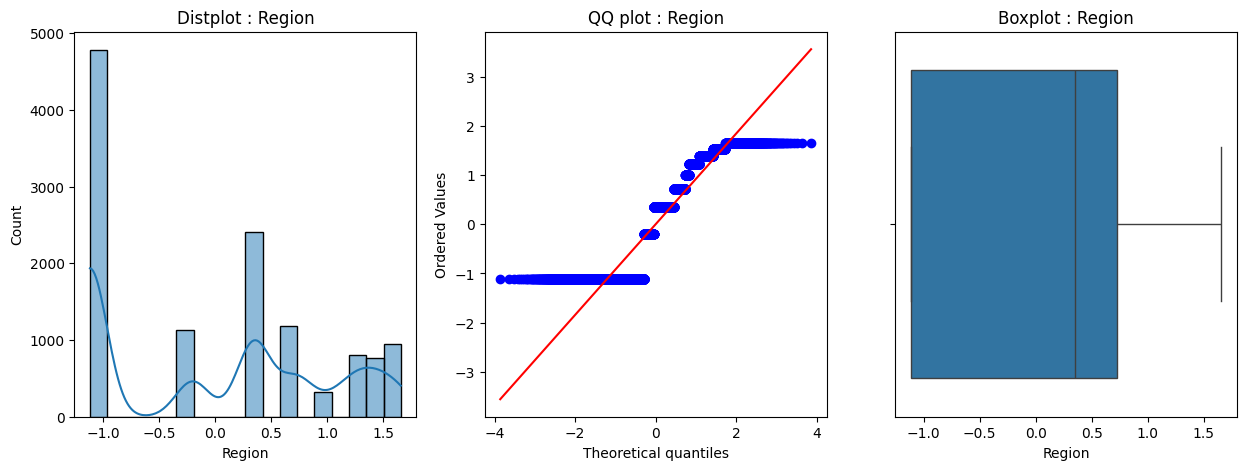

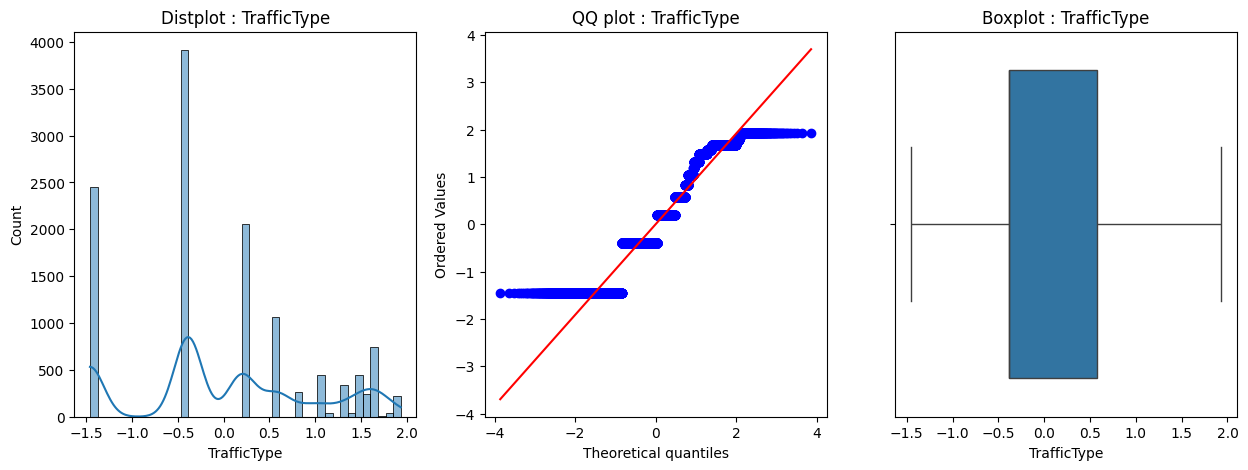

In [25]:
for col in x.select_dtypes(['int64', 'float64']).columns :

    plt.figure(figsize=(15,5))

    plt.subplot(131)
    sns.histplot(x[col],kde=True)
    plt.title(f'Distplot : {col}')

    plt.subplot(132)
    stats.probplot(x[col],dist='norm',plot = plt)
    plt.title(f'QQ plot : {col}')

    plt.subplot(133)
    sns.boxplot( x = col , data = x)
    plt.title(f'Boxplot : {col}')

    plt.savefig(f"Plot_AFTER_{col}.png")


    plt.show()

In [26]:
x.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Returning_Visitor
Administrative,1.000000,0.954632,0.357866,0.353423,0.459392,0.427440,-0.270782,-0.452657,0.333831,-0.125974,0.093164,-0.006614,-0.010490,0.010625,-0.001021,0.040803,0.109651,-0.101797
Administrative_Duration,0.954632,1.000000,0.340414,0.336307,0.433270,0.417924,-0.279572,-0.464177,0.323446,-0.132357,0.093918,-0.013744,-0.017758,0.017840,-0.002505,0.042212,0.134788,-0.126503
Informational,0.357866,0.340414,1.000000,0.948089,0.370589,0.369288,-0.094813,-0.200695,0.224748,-0.052054,0.059267,-0.002434,-0.018165,-0.021286,-0.017143,0.043678,-0.051890,0.057118
Informational_Duration,0.353423,0.336307,0.948089,1.000000,0.365391,0.365283,-0.099386,-0.211653,0.228730,-0.054234,0.054527,0.000575,-0.013017,-0.014171,-0.014386,0.047759,-0.045652,0.050887
ProductRelated,0.459392,0.433270,0.370589,0.365391,1.000000,0.899476,-0.291048,-0.572526,0.347354,-0.023263,0.147227,0.032638,0.046070,-0.024919,-0.057817,0.032333,-0.104441,0.119028
ProductRelated_Duration,0.427440,0.417924,0.369288,0.365283,0.899476,1.000000,-0.338769,-0.551407,0.354070,-0.050068,0.145235,0.034460,0.046420,-0.015770,-0.055309,0.029298,-0.090336,0.101773
BounceRates,-0.270782,-0.279572,-0.094813,-0.099386,-0.291048,-0.338769,1.000000,0.728066,-0.182706,0.146053,-0.059894,0.021520,-0.047688,-0.009281,0.022918,-0.043618,-0.243537,0.242112
ExitRates,-0.452657,-0.464177,-0.200695,-0.211653,-0.572526,-0.551407,0.728066,1.000000,-0.302708,0.150915,-0.096767,0.006084,-0.019257,-0.006117,0.010148,-0.070065,-0.266349,0.257092
PageValues,0.333831,0.323446,0.224748,0.228730,0.347354,0.354070,-0.182706,-0.302708,1.000000,-0.067037,0.061432,0.000928,0.025736,0.002723,-0.012812,0.021533,0.012367,-0.010986
SpecialDay,-0.125974,-0.132357,-0.052054,-0.054234,-0.023263,-0.050068,0.146053,0.150915,-0.067037,1.000000,-0.312543,0.019816,0.019773,-0.014627,0.093176,-0.082948,-0.088859,0.093652


In [27]:
x.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Returning_Visitor
0,-0.990128,-0.996659,-0.520489,-0.491697,-1.922123,-2.096783,2.206432,1.982547,-0.529409,-0.33602,2,-1.594583,-1.630444,-1.116671,-1.458641,0,False,True
1,-0.990128,-0.996659,-0.520489,-0.491697,-1.574524,-1.074189,-0.799209,1.569866,-0.529409,-0.33602,2,0.023949,0.100778,-1.116671,-0.386728,0,False,True
2,-0.990128,-0.996659,-0.520489,-0.491697,-1.922123,-2.096783,2.206432,1.982547,-0.529409,-0.33602,2,1.816290,-1.630444,1.658089,0.199041,0,False,True
3,-0.990128,-0.996659,-0.520489,-0.491697,-1.574524,-1.875436,1.709303,1.832073,-0.529409,-0.33602,2,1.065020,0.100778,-0.199574,0.574105,0,False,True
4,-0.990128,-0.996659,-0.520489,-0.491697,-0.442610,0.057515,0.756734,0.722460,-0.529409,-0.33602,2,1.065020,0.918635,-1.116671,0.574105,1,False,True


In [28]:
y.value_counts()

Revenue
0    10422
1     1908
Name: count, dtype: int64

In [29]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Fit SMOTE to the data and resample
X_resampled, y_resampled = smote.fit_resample(x, y)

# Check the class distribution after resampling
unique, counts = np.unique(y_resampled, return_counts=True)
print(dict(zip(unique, counts)))

{0: 10422, 1: 10422}


In [30]:
# split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=101)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(14590, 18) (6254, 18) (14590,) (6254,)


In [31]:
y_test.value_counts()

Revenue
0    3150
1    3104
Name: count, dtype: int64

In [32]:
y_train.value_counts()

Revenue
1    7318
0    7272
Name: count, dtype: int64

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train),columns = x.columns)
x_test = pd.DataFrame(scaler.fit_transform(x_test),columns = x.columns)

# Deep Learning Models :



##  Using Adam Optimizer





In [ ]:
model = Sequential()
model.add(Dense(64, activation = 'relu', input_dim=x_train.shape[1])) # Hidden Layer 1
model.add(Dense(16, activation = 'relu')) # Hidden Layer 2
model.add(Dense(8, activation = 'relu')) # Hidden Layer 3
model.add(Dense(1, activation = 'sigmoid')) # Output
# Output activation function depends on problem statments
#Eg: Regression - Linear, Binary_Classifi cation- Sigmoid, Multi_Class_Classification - Softmax
model.compile(optimizer='adam',
              loss = "binary_crossentropy"
              ,metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1216      
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2401 (9.38 KB)
Trainable params: 2401 (9.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
456/456 [==============================] - 5s 5ms/step - loss: 0.3957 - accuracy: 0.8254 - val_loss: 0.3297 - val_accuracy: 0.8622
Epoch 2/30
456/456 [==============================] - 2s 4ms/step - loss: 0.3143 - accuracy: 0.8692 - val_loss: 0.3211 - val_accuracy: 0.8663
Epoch 3/30
456/456 [==============================] - 3s 6ms/step - loss: 0.3015 - accuracy: 0.8696 - val_loss: 0.3150 - val_accuracy: 0.8713
Epoch 4/30
456/456 [==============================] - 2s 5ms/step - loss: 0.2904 - accuracy: 0.8766 - val_loss: 0.3147 - val_accuracy: 0.8721
Epoch 5/30
456/456 [==============================] - 2s 5ms/step - loss: 0.2839 - accuracy: 0.8788 - val_loss: 0.3019 - val_accuracy: 0.8745
Epoch 6/30
456/456 [==============================] - 2s 5ms/step - loss: 0.2758 - accuracy: 0.8808 - val_loss: 0.2947 - val_accuracy: 0.8746
Epoch 7/30
456/456 [==============================] - 2s 4ms/step - loss: 0.2686 - accuracy: 0.8831 - val_loss: 0.2910 - val_accuracy: 0.8782
Epoch 

## Using RMSProp Optimizer

In [ ]:
model = Sequential()
model.add(Dense(64, activation = 'relu', input_dim=x_train.shape[1])) # Hidden Layer 1
model.add(Dense(16, activation = 'relu')) # Hidden Layer 2
model.add(Dense(8, activation = 'relu')) # Hidden Layer 3
model.add(Dense(1, activation = 'sigmoid')) # Output
# Output activation function depends on problem statments
#Eg: Regression - Linear, Binary_Classifi cation- Sigmoid, Multi_Class_Classification - Softmax
model.compile(optimizer='rmsprop',
              loss = "binary_crossentropy"
              ,metrics=['accuracy'])

model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
456/456 [==============================] - 3s 5ms/step - loss: 0.3854 - accuracy: 0.8359 - val_loss: 0.3349 - val_accuracy: 0.8615
Epoch 2/30
456/456 [==============================] - 3s 6ms/step - loss: 0.3118 - accuracy: 0.8680 - val_loss: 0.3191 - val_accuracy: 0.8703
Epoch 3/30
456/456 [==============================] - 2s 5ms/step - loss: 0.2974 - accuracy: 0.8744 - val_loss: 0.3081 - val_accuracy: 0.8702
Epoch 4/30
456/456 [==============================] - 2s 4ms/step - loss: 0.2865 - accuracy: 0.8789 - val_loss: 0.3017 - val_accuracy: 0.8734
Epoch 5/30
456/456 [==============================] - 2s 4ms/step - loss: 0.2786 - accuracy: 0.8826 - val_loss: 0.2994 - val_accuracy: 0.8750
Epoch 6/30
456/456 [==============================] - 2s 4ms/step - loss: 0.2719 - accuracy: 0.8850 - val_loss: 0.2953 - val_accuracy: 0.8767
Epoch 7/30
456/456 [==============================] - 2s 4ms/step - loss: 0.2653 - accuracy: 0.8887 - val_loss: 0.3000 - val_accuracy: 0.8746
Epoch 

# AdaGrad

In [ ]:
model = Sequential()
model.add(Dense(64, activation = 'relu', input_dim=x_train.shape[1])) # Hidden Layer 1
model.add(Dense(16, activation = 'relu')) # Hidden Layer 2
model.add(Dense(8, activation = 'relu')) # Hidden Layer 3
model.add(Dense(1, activation = 'sigmoid')) # Output
model.compile(optimizer='adagrad',
              loss = "binary_crossentropy"
              ,metrics=['accuracy'])

model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
456/456 [==============================] - 4s 6ms/step - loss: 0.6921 - accuracy: 0.5025 - val_loss: 0.6757 - val_accuracy: 0.5013
Epoch 2/30
456/456 [==============================] - 2s 5ms/step - loss: 0.6657 - accuracy: 0.5199 - val_loss: 0.6560 - val_accuracy: 0.5342
Epoch 3/30
456/456 [==============================] - 2s 4ms/step - loss: 0.6478 - accuracy: 0.5594 - val_loss: 0.6392 - val_accuracy: 0.5823
Epoch 4/30
456/456 [==============================] - 2s 5ms/step - loss: 0.6318 - accuracy: 0.6039 - val_loss: 0.6239 - val_accuracy: 0.6303
Epoch 5/30
456/456 [==============================] - 2s 4ms/step - loss: 0.6172 - accuracy: 0.6464 - val_loss: 0.6102 - val_accuracy: 0.6690
Epoch 6/30
456/456 [==============================] - 3s 6ms/step - loss: 0.6040 - accuracy: 0.6779 - val_loss: 0.5978 - val_accuracy: 0.6980
Epoch 7/30
456/456 [==============================] - 3s 6ms/step - loss: 0.5918 - accuracy: 0.7025 - val_loss: 0.5866 - val_accuracy: 0.7223
Epoch 

# SGD - Stochastic Gradient Momentum

In [34]:
model = Sequential()
model.add(Dense(64, activation = 'relu', input_dim=x_train.shape[1])) # Hidden Layer 1
model.add(Dense(16, activation = 'relu')) # Hidden Layer 2
model.add(Dense(8, activation = 'relu')) # Hidden Layer 3
model.add(Dense(1, activation = 'sigmoid')) # Output
model.compile(optimizer='SGD',
              loss = "binary_crossentropy"
              ,metrics=['accuracy'])

history_sgd  = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
456/456 [==============================] - 5s 6ms/step - loss: 0.6034 - accuracy: 0.7107 - val_loss: 0.4799 - val_accuracy: 0.7977
Epoch 2/20
456/456 [==============================] - 3s 6ms/step - loss: 0.4141 - accuracy: 0.8284 - val_loss: 0.3700 - val_accuracy: 0.8462
Epoch 3/20
456/456 [==============================] - 2s 5ms/step - loss: 0.3577 - accuracy: 0.8494 - val_loss: 0.3496 - val_accuracy: 0.8494
Epoch 4/20
456/456 [==============================] - 2s 4ms/step - loss: 0.3406 - accuracy: 0.8544 - val_loss: 0.3397 - val_accuracy: 0.8550
Epoch 5/20
456/456 [==============================] - 2s 4ms/step - loss: 0.3306 - accuracy: 0.8593 - val_loss: 0.3322 - val_accuracy: 0.8602
Epoch 6/20
456/456 [==============================] - 2s 4ms/step - loss: 0.3235 - accuracy: 0.8622 - val_loss: 0.3295 - val_accuracy: 0.8609
Epoch 7/20
456/456 [==============================] - 3s 6ms/step - loss: 0.3183 - accuracy: 0.8633 - val_loss: 0.3276 - val_accuracy: 0.8631
Epoch 

#Graphs for SGD

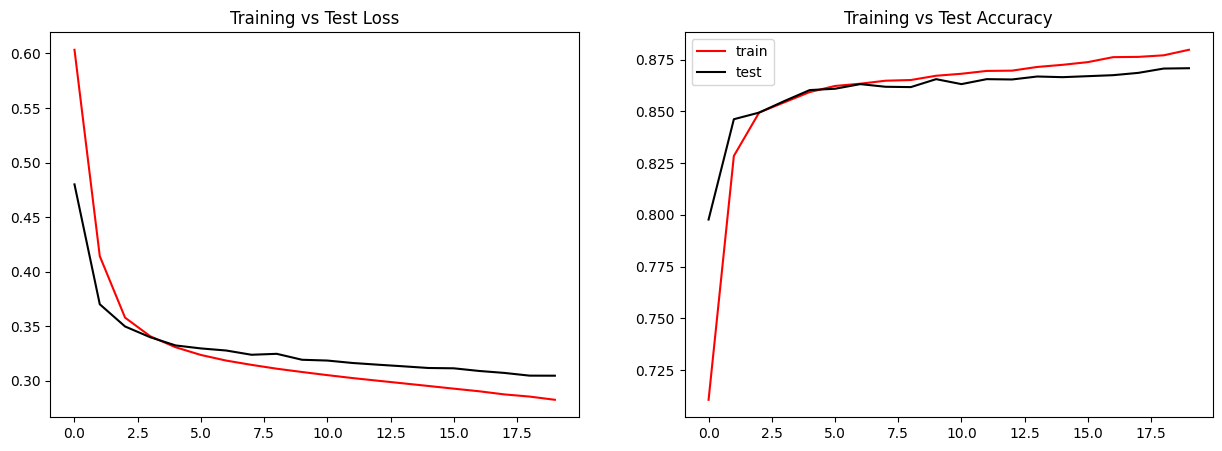

In [35]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.title(f'Training vs Test Loss')

plt.plot(history_sgd.history['loss'], color='red', label='train')
plt.plot(history_sgd.history['val_loss'], color='black', label='test')

plt.subplot(122)
plt.title(f'Training vs Test Accuracy')
plt.plot(history_sgd.history['accuracy'], color='red', label='train')
plt.plot(history_sgd.history['val_accuracy'], color='black', label='test')


plt.legend()
plt.show()

# SGD Momentum with NAG

In [43]:
sgd_opt = keras.optimizers.SGD(
    learning_rate=0.01,
    momentum=0.001,
    nesterov=True,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    name="SGD"
)

model = Sequential()
model.add(Dense(64, activation = 'relu', input_dim=x_train.shape[1])) # Hidden Layer 1
model.add(Dense(16, activation = 'relu')) # Hidden Layer 2
model.add(Dense(8, activation = 'relu')) # Hidden Layer 3
model.add(Dense(1, activation = 'sigmoid')) # Output
model.compile(optimizer= sgd_opt ,
      loss = "binary_crossentropy",
      metrics=['accuracy'])

history_sgd_momentum_NAG = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
456/456 [==============================] - 4s 6ms/step - loss: 0.5442 - accuracy: 0.7458 - val_loss: 0.4220 - val_accuracy: 0.8292
Epoch 2/20
456/456 [==============================] - 2s 5ms/step - loss: 0.3853 - accuracy: 0.8413 - val_loss: 0.3642 - val_accuracy: 0.8471
Epoch 3/20
456/456 [==============================] - 2s 5ms/step - loss: 0.3525 - accuracy: 0.8509 - val_loss: 0.3468 - val_accuracy: 0.8547
Epoch 4/20
456/456 [==============================] - 2s 5ms/step - loss: 0.3371 - accuracy: 0.8594 - val_loss: 0.3375 - val_accuracy: 0.8614
Epoch 5/20
456/456 [==============================] - 3s 6ms/step - loss: 0.3267 - accuracy: 0.8642 - val_loss: 0.3322 - val_accuracy: 0.8646
Epoch 6/20
456/456 [==============================] - 3s 6ms/step - loss: 0.3201 - accuracy: 0.8661 - val_loss: 0.3277 - val_accuracy: 0.8644
Epoch 7/20
456/456 [==============================] - 2s 4ms/step - loss: 0.3145 - accuracy: 0.8690 - val_loss: 0.3252 - val_accuracy: 0.8618
Epoch 

# Graphs for SGD with Momentum with NAG

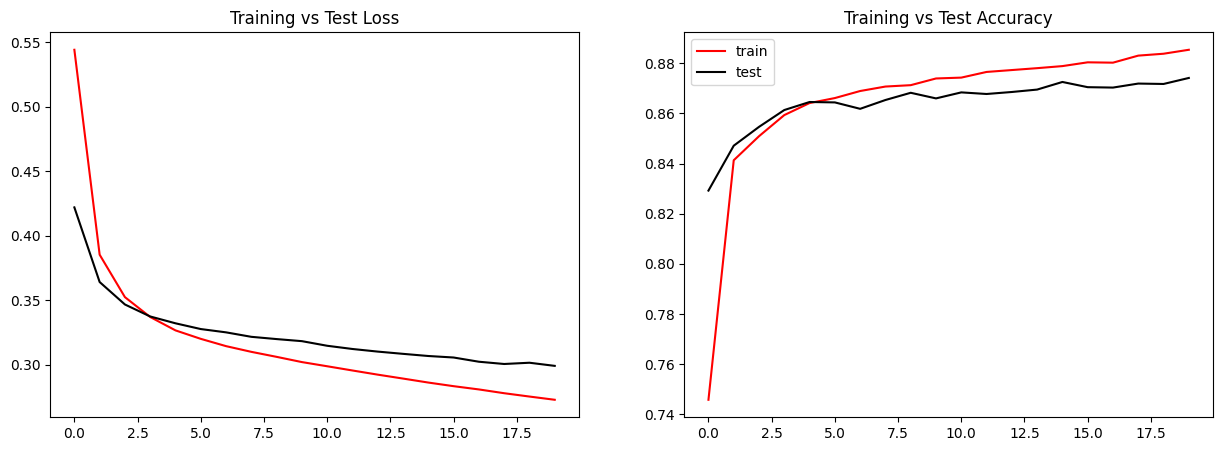

In [44]:
plt.figure(figsize=(15,5))

plt.subplot(121)

plt.title(f'Training vs Test Loss')

plt.plot(history_sgd_momentum_NAG.history['loss'], color='red', label='train')
plt.plot(history_sgd_momentum_NAG.history['val_loss'], color='black', label='test')



plt.subplot(122)
plt.title(f'Training vs Test Accuracy')
plt.plot(history_sgd_momentum_NAG.history['accuracy'], color='red', label='train')
plt.plot(history_sgd_momentum_NAG.history['val_accuracy'], color='black', label='test')


plt.legend()
plt.show()

# SGD Momentum without NAG

In [45]:
sgd_opt = keras.optimizers.SGD(
    learning_rate=0.01,
    momentum=0.01,
    nesterov=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    name="SGD"
)

model = Sequential()
model.add(Dense(64, activation = 'relu', input_dim=x_train.shape[1])) # Hidden Layer 1
model.add(Dense(16, activation = 'relu')) # Hidden Layer 2
model.add(Dense(8, activation = 'relu')) # Hidden Layer 3
model.add(Dense(1, activation = 'sigmoid')) # Output
model.compile(optimizer= sgd_opt ,
      loss = "binary_crossentropy",
      metrics=['accuracy'])

hsitory_sgd_momentum = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
456/456 [==============================] - 3s 5ms/step - loss: 0.5325 - accuracy: 0.7551 - val_loss: 0.4134 - val_accuracy: 0.8380
Epoch 2/20
456/456 [==============================] - 2s 5ms/step - loss: 0.3817 - accuracy: 0.8445 - val_loss: 0.3632 - val_accuracy: 0.8476
Epoch 3/20
456/456 [==============================] - 3s 6ms/step - loss: 0.3487 - accuracy: 0.8539 - val_loss: 0.3435 - val_accuracy: 0.8585
Epoch 4/20
456/456 [==============================] - 2s 4ms/step - loss: 0.3324 - accuracy: 0.8624 - val_loss: 0.3337 - val_accuracy: 0.8612
Epoch 5/20
456/456 [==============================] - 2s 5ms/step - loss: 0.3223 - accuracy: 0.8668 - val_loss: 0.3267 - val_accuracy: 0.8628
Epoch 6/20
456/456 [==============================] - 2s 4ms/step - loss: 0.3149 - accuracy: 0.8674 - val_loss: 0.3201 - val_accuracy: 0.8679
Epoch 7/20
456/456 [==============================] - 2s 5ms/step - loss: 0.3093 - accuracy: 0.8694 - val_loss: 0.3173 - val_accuracy: 0.8670
Epoch 

# SGD Momentum without NAG

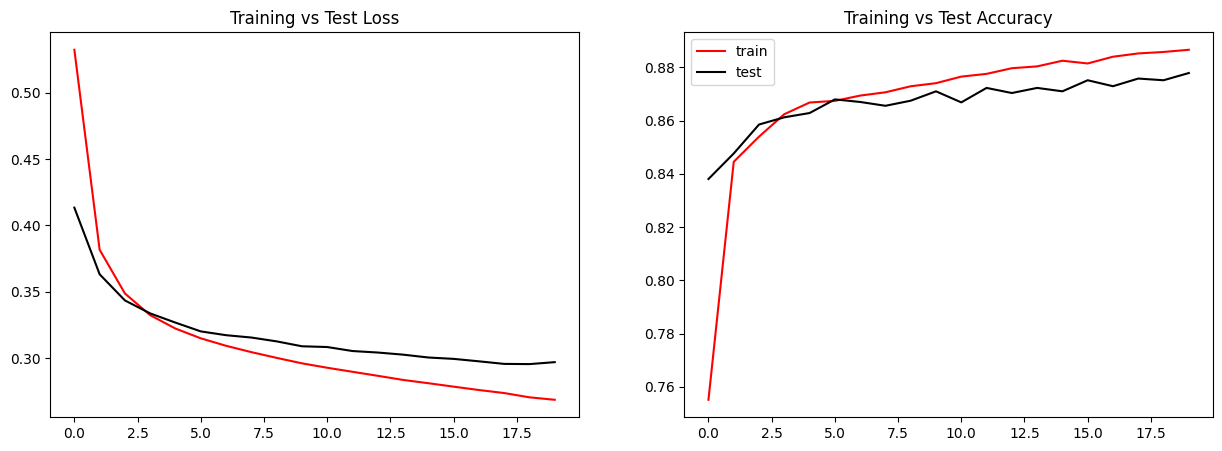

In [46]:

plt.figure(figsize=(15,5))

plt.subplot(121)
plt.title(f'Training vs Test Loss')

plt.plot(hsitory_sgd_momentum.history['loss'], color='red', label='train')
plt.plot(hsitory_sgd_momentum.history['val_loss'], color='black', label='test')

plt.subplot(122)
plt.title(f'Training vs Test Accuracy')
plt.plot(hsitory_sgd_momentum.history['accuracy'], color='red', label='train')
plt.plot(hsitory_sgd_momentum.history['val_accuracy'], color='black', label='test')


plt.legend()
plt.show()

# SGD NAG without Momentum

In [ ]:
sgd_opt = keras.optimizers.SGD(
    learning_rate=0.01,
    momentum=0.0,
    nesterov=True,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    name="SGD"
)

model = Sequential()
model.add(Dense(64, activation = 'relu', input_dim=x_train.shape[1])) # Hidden Layer 1
model.add(Dense(16, activation = 'relu')) # Hidden Layer 2
model.add(Dense(8, activation = 'relu')) # Hidden Layer 3
model.add(Dense(1, activation = 'sigmoid')) # Output
model.compile(optimizer= sgd_opt ,
      loss = "binary_crossentropy",
      metrics=['accuracy'])

model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
456/456 [==============================] - 4s 5ms/step - loss: 0.5347 - accuracy: 0.7448 - val_loss: 0.4089 - val_accuracy: 0.8345
Epoch 2/30
456/456 [==============================] - 2s 4ms/step - loss: 0.3766 - accuracy: 0.8464 - val_loss: 0.3587 - val_accuracy: 0.8500
Epoch 3/30
456/456 [==============================] - 2s 5ms/step - loss: 0.3468 - accuracy: 0.8559 - val_loss: 0.3440 - val_accuracy: 0.8591
Epoch 4/30
456/456 [==============================] - 2s 5ms/step - loss: 0.3328 - accuracy: 0.8604 - val_loss: 0.3342 - val_accuracy: 0.8618
Epoch 5/30
456/456 [==============================] - 2s 5ms/step - loss: 0.3239 - accuracy: 0.8629 - val_loss: 0.3282 - val_accuracy: 0.8636
Epoch 6/30
456/456 [==============================] - 3s 7ms/step - loss: 0.3172 - accuracy: 0.8657 - val_loss: 0.3233 - val_accuracy: 0.8638
Epoch 7/30
456/456 [==============================] - 2s 4ms/step - loss: 0.3116 - accuracy: 0.8681 - val_loss: 0.3211 - val_accuracy: 0.8650
Epoch 